# Single feature model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

# Classification

In [2]:
# load dataset

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


In [3]:
sel = SelectBySingleFeaturePerformance(
    estimator=DecisionTreeClassifier(random_state=10),
    scoring='roc_auc',
    cv=3,
    threshold=None,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeClassifier(random_state=10))

In [4]:
# the features to drop

sel.features_to_drop_

['mean texture',
 'mean smoothness',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst smoothness',
 'worst symmetry',
 'worst fractal dimension']

In [5]:
sel.feature_performance_

{'mean radius': 0.8051021129248817,
 'mean texture': 0.603808918097661,
 'mean perimeter': 0.8171860645890751,
 'mean area': 0.8124867500529999,
 'mean smoothness': 0.6064235743057028,
 'mean compactness': 0.7132004805314112,
 'mean concavity': 0.7906155042046499,
 'mean concave points': 0.8486679386615789,
 'mean symmetry': 0.5672037311850753,
 'mean fractal dimension': 0.5348031941205569,
 'radius error': 0.7361317221397782,
 'texture error': 0.48441806232775075,
 'perimeter error': 0.7451416860999224,
 'area error': 0.7631262808282101,
 'smoothness error': 0.5168539325842696,
 'compactness error': 0.5755423644972087,
 'concavity error': 0.6033142534096531,
 'concave points error': 0.6228181753939651,
 'symmetry error': 0.5144512755282312,
 'fractal dimension error': 0.553812451416861,
 'worst radius': 0.8500459331496008,
 'worst texture': 0.6172708642498764,
 'worst perimeter': 0.8922337643982757,
 'worst area': 0.8529079217016465,
 'worst smoothness': 0.5829623348173274,
 'worst co

Text(0.5, 1.0, 'Univariate performance')

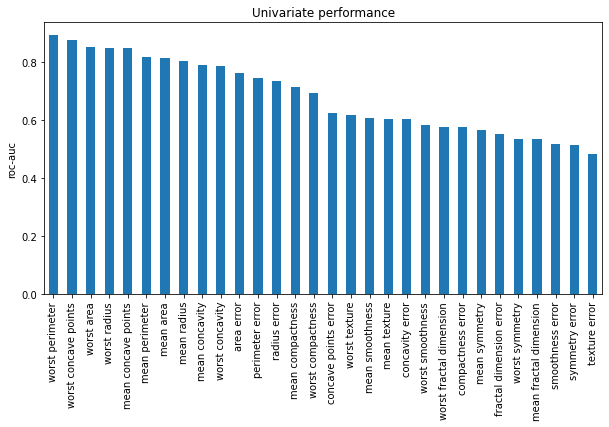

In [6]:
pd.Series(sel.feature_performance_).sort_values(
    ascending=False).plot.bar(figsize=(10, 5))

plt.ylabel('roc-auc')
plt.title('Univariate performance')

In [7]:
# drop features

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((426, 15), (143, 15))

# Regression

In [13]:
# load the California House price data

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
sel = SelectBySingleFeaturePerformance(
    estimator=DecisionTreeRegressor(random_state=10),
    scoring='neg_mean_squared_error',
    cv=3,
    threshold=None,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeRegressor(random_state=10),
                                 scoring='neg_mean_squared_error')

In [15]:
# the features to drop

sel.features_to_drop_

['AveRooms', 'AveBedrms', 'Population', 'AveOccup']

Text(0.5, 1.0, 'Univariate performance')

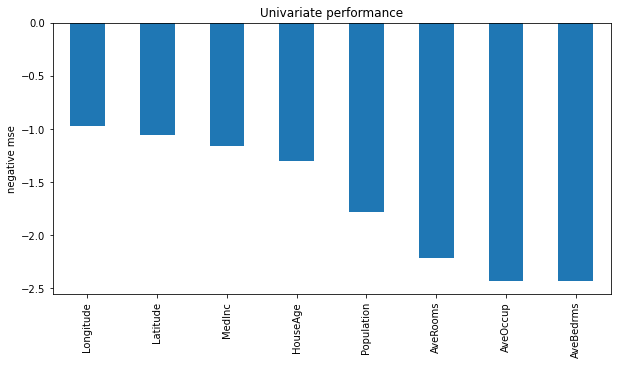

In [16]:
pd.Series(sel.feature_performance_
          ).sort_values(ascending=False
                        ).plot.bar(figsize=(10, 5))

plt.ylabel('negative mse')
plt.title('Univariate performance')

In [17]:
# drop features

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((15480, 4), (5160, 4))